In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example performance dictionary
# Format: {benchmark_name: {method: score, ...}, ...}
performance = {
    "Mujoco": {
        "HyperSimba": 1.617,
        "MR.Q": 1.39,
        "CrossQ": 1.475,
        "TD3+OFE": 1.322,
        "TD7": 1.57,
    },
    "DMC": {
        "HyperSimba": 0.838,
        "Simba": 0.825,
        "MR.Q": 0.835,
        "TD7": 0.566,
        "TD-MPC2": 0.783,
        #"DreamerV3": 0.530,
    },
    "MyoSuite": {
        "HyperSimba": 0.847,
        "Simba": 0.743,
        "BRO": 0.714,
        "TD-MPC2": 0.650,
        "SAC": 0.607,
    },
    "HBench": {
        "HyperSimba": 0.776,
        "TD-MPC2": 0.701,
        "Simba": 0.606,
        "BRO": 0.468,
        "TD7": 0.289,
    },
    "OnlineRL": {
        "HyperSimba": 0.892,
        "Simba": 0.794,
        #"MR.Q": 0.xxx,
        "TD7": 0.575,
        "TD-MPC2": 0.764,
        "DreamerV3": 0.297,
    },
    "OfflineRL": {
        "SimbaV2+BC": 0.867,
        "TD7+BC": 0.872,
        "DQL": 0.824,
        "IDQL": 0.791,
        "DC": 0.790,
    },
    "FPSTrain": {
        "HyperSimba": 92,
        "Simba": 94,
        #"MR.Q": 0.xxx,
        "BRO": 80,
        "TD-MPC2": 60,
        "DreamerV3": 32,
    },
    "FPSEval": {
        "HyperSimba": 1.240,
        "Simba": 1.320,
        #"MR.Q": 0.xxx,
        "BRO": 1.000,
        "TD-MPC2": 0.140,
        "DreamerV3": 0.280,
    },
}

# error: 0.111 <- fake value
performance_errors = {
    "Mujoco": {
        "HyperSimba": 0.103,
        "MR.Q": 0.08,
        "CrossQ": 0.141,
        "TD3+OFE": 0.263,
        "TD7": 0.03,
    },
    # real-value
    "DMC": {
        "HyperSimba": 0.003,
        "Simba": 0.004,
        "MR.Q": 0.006,
        "TD7": 0.022,
        "TD-MPC2": 0.0140,
        #"DreamerV3": 0.530,
    },
    "MyoSuite": {
        "HyperSimba": 0.066,
        "Simba": 0.079,
        "BRO": 0.076,
        "TD-MPC2": 0.148,
        "SAC": 0.088,
    },
    "HBench": {
        "HyperSimba": 0.071,
        "Simba": 0.073,
        "TD7": 0.111,
        "TD-MPC2": 0.133,
        "BRO": 0.107,
    },
    "OnlineRL": {
        "HyperSimba": 0.0454,
        "Simba": 0.0472,
        "TD7": 0.0600,
        "TD-MPC2": 0.0702,
        "DreamerV3": 0.1106,
    },
    "OfflineRL": {
        "SimbaV2+BC": 0.016,
        "TD7+BC": 0.016,
        "DQL": 0.0,
        "IDQL": 0.0,
        "DC": 0.0,
    },
    "FPSTrain": {
        "HyperSimba": 0.0,
        "Simba":0.0,
        #"MR.Q": 0.xxx,
        "BRO": 0.0,
        "TD-MPC2": 0.0,
        "DreamerV3": 0.0,
    },
    "FPSEval": {
        "HyperSimba": 0.0,
        "Simba": 0.0,
        #"MR.Q": 0.xxx,
        "BRO": 0.0,
        "TD-MPC2": 0.0,
        "DreamerV3": 0.0,
    },
}


# Dictionary of {method: color} for easy theme switching
GRAY = "#E6E6E6" # "#F6F6F6"
BORDER_GRAY = "#E6E6E6" # "#E6E6E6"
# BLUE (light->dark) #B9D4FB -> #A7BFFA -> #648EF6 -> #2D66F3
# ORANGE #F9C33E #FEE094

# Hypersimba set1: "#B9D4FB" + "#648EF6"
# Hypersimba set2: "#2D66F3"
# Simba set2: "#F9C33E"
# #F5CB64 #F5CE7B #F5C76A
method_colors = {
    "SimbaV2+BC": "#648EF6", # "#C7DDEC", # blue
    "HyperSimba": "#648EF6", # "#C7DDEC", # blue
    "Simba": "#F6CC64", # orange
}

# Dictionary of {method: color} for easy theme switching
# We won't need this anymore
method_boundary_colors = {
    "SimbaV2+BC": "#648EF6", # "#1F77B4", # blue
    "HyperSimba": "#648EF6", # "#1F77B4", # blue
    "Simba": "#F6CC64", # orange
}

# Convert the nested dictionary into a long DataFrame
# Columns: [benchmark, method, result]
rows = []
for bench, methods in performance.items():
    for method, result in methods.items():
        rows.append((bench, method, result))

df = pd.DataFrame(rows, columns=["Benchmark", "Method", "Result"])
df

,Benchmark,Method,Result
0,Mujoco,HyperSimba,1.617
1,Mujoco,MR.Q,1.390
2,Mujoco,CrossQ,1.475
3,Mujoco,TD3+OFE,1.322
4,Mujoco,TD7,1.570
5,DMC,HyperSimba,0.838
6,DMC,Simba,0.825
7,DMC,MR.Q,0.835
8,DMC,TD7,0.566
9,DMC,TD-MPC2,0.783


In [3]:
def set_identical_grid(ax, num_x_ticks, num_y_ticks, tick_x_min, tick_x_max, tick_y_min, tick_y_max):
    # This function adds evenly spaced grid lines
    ax.xaxis.set_major_locator(plt.MaxNLocator(num_x_ticks, integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(num_y_ticks, integer=True))
    ax.xaxis.grid(True, linestyle='--', linewidth=1.0, alpha=1.0)
    ax.yaxis.grid(True, linestyle='--', linewidth=1.0, alpha=1.0)
    # Set ticks after limits are defined
    ax.set_xticks(np.linspace(tick_x_min, tick_x_max, num_x_ticks))
    ax.set_yticks(np.linspace(tick_y_min, tick_y_max, num_y_ticks))

def simple_axis(ax):
    # Hide all spines for a simpler look
    for spine in ax.spines.values():
        spine.set_visible(False)

/tmp/ipykernel_1699465/411352391.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_1699465/411352391.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_1699465/411352391.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_1699465/411352391.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


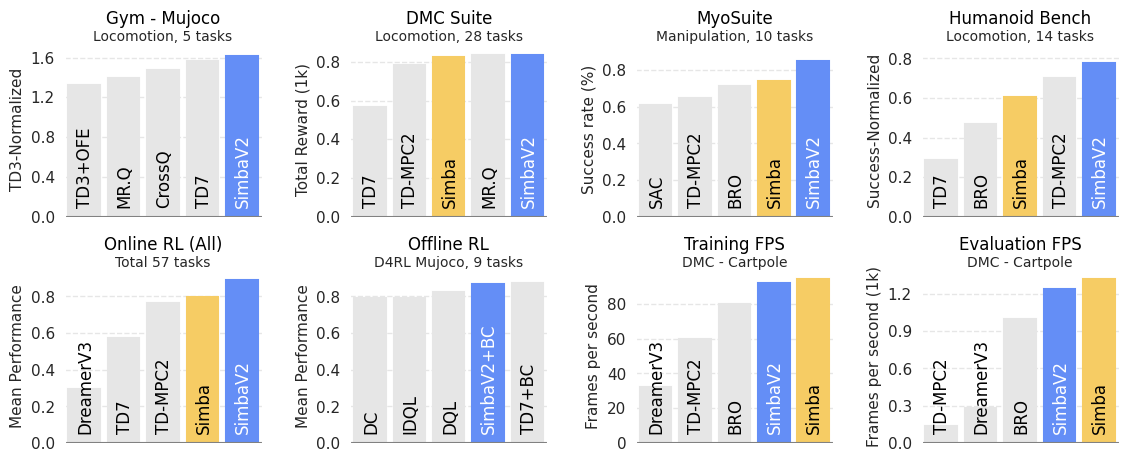

In [4]:
# Figure parameters
subfig_w, subfig_h = 3.4, 2.6 # 3.4, 3.1
nrows, ncols = 2, 4
TITLE_Y_OFF = 1.06 # 1.11
SUBTITLE_Y_OFF = 1.01 # 1.04
hspace, wspace = 0.3, 0.45
title_font_size = 12 # 15
subtitle_font_size = 10 # 12
method_font_size = 12 # 14.5
y_label_font_size = 11 # 14
y_tick_font_size = 9 # 12
OURS_NAME = 'SimbaV2'

# Set up the figure
sns.set_style('darkgrid', {"axes.facecolor": "white", "grid.color": BORDER_GRAY})
#sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
fig, axes = plt.subplots(nrows, ncols, figsize=(subfig_w*ncols, subfig_h*nrows), sharey=False) #, gridspec_kw={'wspace':0.3, 'hspace':0.3})

if nrows > 1:
    axes = [x for xs in axes for x in xs] # flatten nested list
if len(performance) == 1:
    axes = [axes]  # Ensure axes is iterable if only one benchmark

for ax, benchmark in zip(axes, ['Mujoco', 'DMC', 'MyoSuite', 'HBench', 'OnlineRL', 'OfflineRL', 'FPSTrain', 'FPSEval']):

    if benchmark == 'Mujoco':
        title = 'Gym - Mujoco'
        subtitle = 'Locomotion, 5 tasks'
        ylabel = 'TD3-Normalized'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 1.6, 1.75
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1

    elif benchmark == 'DMC':
        title = 'DMC Suite'
        subtitle = 'Locomotion, 28 tasks'
        ylabel = 'Total Reward (1k)'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 0.8, 0.9
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1

    elif benchmark == 'MyoSuite':
        title = 'MyoSuite'
        subtitle = 'Manipulation, 10 tasks'
        ylabel = 'Success rate (%)'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 0.8, 0.95
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1

    elif benchmark == 'HBench':
        title = 'Humanoid Bench'
        subtitle = 'Locomotion, 14 tasks'
        ylabel = 'Success-Normalized'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 0.8, 0.88
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1

    elif benchmark == 'OnlineRL':
        title = 'Online RL (All)'
        subtitle = 'Total 57 tasks'
        ylabel = 'Mean Performance'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 0.8, 0.95
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1
        
    elif benchmark == 'OfflineRL':
        title = 'Offline RL'
        subtitle = 'D4RL Mujoco, 9 tasks'
        ylabel = 'Mean Performance'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 0.8, 0.95
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1
        
    elif benchmark == 'FPSTrain':
        title = 'Training FPS'
        subtitle = 'DMC - Cartpole'
        ylabel = 'Frames per second'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 80, 100
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1
        
    elif benchmark == 'FPSEval':
        title = 'Evaluation FPS'
        subtitle = 'DMC - Cartpole'
        ylabel = 'Frames per second (1k)'
        tick_x_min, x_lim_min = 0.0, 0.0
        tick_x_max, x_lim_max = 4.0, 4.0
        tick_y_min, y_lim_min = 0.0, 0.0
        tick_y_max, y_lim_max = 1.2, 1.4
        num_x_ticks = 0
        num_y_ticks = 5 # 4 + 1

    else:
        raise ValueError

    # Subset the dataframe for this benchmark
    bench_df = df[df["Benchmark"] == benchmark].sort_values("Result", ascending=True)
    method_order = bench_df["Method"].tolist()
    y_errors = [performance_errors[benchmark][m] for m in method_order]
    
    # Create the barplot with black boundary and thicker line width
    bar_plot = sns.barplot(
        x="Method", 
        y="Result", 
        data=bench_df, 
        ax=ax,
        palette='hls', # temporary
        edgecolor='black',  # temporary
        linewidth=1.5,
    )

    # Update each bar's color individually after plotting
    for patch, method in zip(bar_plot.patches, bench_df["Method"]):
        if method in method_boundary_colors:
            boundary_color = method_boundary_colors[method]
        else:
            boundary_color = BORDER_GRAY

        if method in method_colors:
            face_color = method_colors[method]
        else:
            face_color = GRAY

        patch.set_edgecolor(boundary_color)
        patch.set_facecolor(face_color)
        patch.set_linewidth(1.5)

    # for i, (patch, method) in enumerate(zip(bar_plot.patches, bench_df["Method"])):
    #     x = patch.get_x() + patch.get_width() / 2
    #     y = patch.get_height()
    #     err = y_errors[i]

    #     ax.errorbar(
    #         x, y,
    #         yerr=err,
    #         fmt='none',
    #         ecolor=method_boundary_colors[method],
    #         elinewidth=1.5,
    #         capsize=3,
    #         capthick=1.5
    #     )
    
    # Add the method name inside each bar
    for patch, label in zip(bar_plot.patches, bench_df["Method"]):
        height = patch.get_height()
        x = patch.get_x() + patch.get_width() / 2
        # Place the text slightly above the bottom of the bar
        ax.text(
            x+0.03, y_lim_max*0.05, label if label not in ['HyperSimba', 'HyperSimba+BC'] else OURS_NAME, 
            ha="center", va="bottom", rotation=90, 
            color="white" if label in ['HyperSimba', 'SimbaV2+BC'] else "black",  # color="k", # 
            fontsize=method_font_size,
        )

    # Draw bottom line (x-axis)
    ax.plot([-1000,1000],[0,0], c="#7A7A7A")

    # title / x-label / y-label
    ax.set_title(title, fontsize=title_font_size, y=TITLE_Y_OFF, fontweight='medium', color='black')
    ax.text(x_lim_max/2, y_lim_max*SUBTITLE_Y_OFF, subtitle, fontsize=subtitle_font_size, ha='center')

    ax.set_xlabel('')
    ax.set_xticks([], [])
    ax.set_xlim(x_lim_min-0.5, x_lim_max+0.5)

    ax.set_ylabel(ylabel, fontsize=y_label_font_size, y=0.5)
    ax.tick_params(axis='y', labelsize=11)
    ax.set_ylim(y_lim_min, y_lim_max)

    set_identical_grid(
        ax, 
        num_x_ticks=num_x_ticks, 
        num_y_ticks=num_y_ticks,
        tick_x_min=tick_x_min,
        tick_x_max=tick_x_max,
        tick_y_min=tick_y_min,
        tick_y_max=tick_y_max,
    )
    # simple_axis(ax)
    #sns.despine(ax=ax)

    # Optionally set a common y-label (for the leftmost plot)
    #if ax == axes[0]:
    #    ax.set_ylabel("Performance Score")

plt.tight_layout
fig.subplots_adjust(hspace=hspace, wspace=wspace)
plt.savefig("benchmark.pdf",bbox_inches='tight')